In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

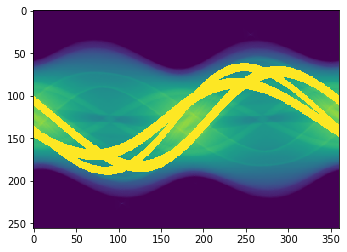

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
for i in range(256):
    if min(metal3_img[i]) < 0:
        print("x")
max(metal3_img[100])

300.0

In [7]:
result_img = metal3_img
window_size = 9

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(window_size, 1, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 1, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 1, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 1, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 1, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 1, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
k = 0
for i in range(256-window_size-1):
    for j in range(100):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                k = k+1

In [10]:
train_data = np.zeros((k,window_size,1,1))
result_data = np.zeros((k,1))
k = 0
for i in range(256-window_size-1):
    for j in range(100):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                for w in range(window_size):
                    train_data[k,w,0,0] = result_img[i+w,j]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=10)

(16019, 9, 1, 1)
(16019, 1)
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 3.9837 - accuracy: 0.2940
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 3.3491 - accuracy: 0.3061
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 3.2549 - accuracy: 0.3081
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 3.1959 - accuracy: 0.3107
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 3.1443 - accuracy: 0.3092
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 3.1001 - accuracy: 0.3103
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 3.0446 - accuracy: 0.3160
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 2.9942 - accuracy: 0.3149
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 2.9046 - accuracy: 0.3177
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - los

In [11]:
l = 0
for i in range(256-window_size-1):
    for j in range(100):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,1,1))
            for w in range(window_size):
                test_data[0,w,0,0] = result_img[i+w,j]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])
            l = l+1

    k = 0
    z = 0

    for i in range(256-window_size-1):
        for j in range(100):
            if 0 in result_img[i:i+window_size+1,j]:
                z=0
            else:
                if 300 in result_img[i:i+window_size+1,j]:
                    z = 0
                else:
                    k = k+1
    train_data = np.zeros((k,window_size,1,1))
    result_data = np.zeros((k,1))
            
    k = 0

    for i in range(256-window_size-1):
        for j in range(100):
            if 0 in result_img[i:i+1+window_size,j]:
                z=0
            else:
                if 300 in result_img[i:i+1+window_size,j]:
                    z = 0
                else:
                    for w in range(window_size):
                        train_data[k,w,0,0] = result_img[i+w,j]
                    result_data[k,0] = int(result_img[i+window_size,j])
                    k = k+1
    model.fit(train_data, result_data, epochs=10)

Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 2.6756 - accuracy: 0.3289
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 2.6046 - accuracy: 0.3325
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 2.5528 - accuracy: 0.3337
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 2.4981 - accuracy: 0.3399: 0s - l
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 2.4607 - accuracy: 0.3423
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 2.4284 - accuracy: 0.3437
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 2.3926 - accuracy: 0.3463
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 2.3740 - accuracy: 0.3463
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 2.3432 - accuracy: 0.3511
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 2.3401 - accuracy

501/501 [==============================] - 1s 2ms/step - loss: 1.8552 - accuracy: 0.4078
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8435 - accuracy: 0.4054
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8659 - accuracy: 0.4075
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8441 - accuracy: 0.4117
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8358 - accuracy: 0.4093
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8364 - accuracy: 0.4114
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8168 - accuracy: 0.4115
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8233 - accuracy: 0.4106
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8214 - accuracy: 0.4118
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.8274 - accuracy: 0.4118
Epoch 2/10

501/501 [==============================] - 1s 2ms/step - loss: 1.6806 - accuracy: 0.4354
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6965 - accuracy: 0.4336: 0s - l
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6841 - accuracy: 0.4392
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6801 - accuracy: 0.4400
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6784 - accuracy: 0.4369
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6724 - accuracy: 0.4391: 0s -
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6794 - accuracy: 0.4360
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6780 - accuracy: 0.4367
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6783 - accuracy: 0.4356
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6680 - accuracy: 0.4

501/501 [==============================] - 1s 2ms/step - loss: 1.5965 - accuracy: 0.4580
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5999 - accuracy: 0.4524
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5980 - accuracy: 0.4561
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5995 - accuracy: 0.4546
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.6004 - accuracy: 0.4534
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5984 - accuracy: 0.4516
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5912 - accuracy: 0.4534
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5973 - accuracy: 0.4557
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5859 - accuracy: 0.4553
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5918 - accuracy: 0.4528
Epoch 4/10

Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5383 - accuracy: 0.4633
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5347 - accuracy: 0.4680
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5338 - accuracy: 0.4684
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5438 - accuracy: 0.4660
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5345 - accuracy: 0.4658
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5409 - accuracy: 0.4683
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5321 - accuracy: 0.4634
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5270 - accuracy: 0.4676
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5315 - accuracy: 0.4644
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5347 - accuracy: 0.4675

501/501 [==============================] - 1s 2ms/step - loss: 1.5078 - accuracy: 0.4711
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.5121 - accuracy: 0.4682
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4914 - accuracy: 0.4744
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4924 - accuracy: 0.4744
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4881 - accuracy: 0.4772
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4946 - accuracy: 0.4726
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4983 - accuracy: 0.4756
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4927 - accuracy: 0.4752
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4790 - accuracy: 0.4771
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4905 - accuracy: 0.4758
Epoch 7/10

Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4586 - accuracy: 0.4817
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4581 - accuracy: 0.4827
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4550 - accuracy: 0.4831
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4624 - accuracy: 0.4847
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4498 - accuracy: 0.4879
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4604 - accuracy: 0.4862
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4665 - accuracy: 0.4798
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4517 - accuracy: 0.4837
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4784 - accuracy: 0.4792
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4403 - accuracy: 0.4890

501/501 [==============================] - 1s 2ms/step - loss: 1.4287 - accuracy: 0.4914
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4396 - accuracy: 0.4918
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4238 - accuracy: 0.4929
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4231 - accuracy: 0.4929
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4169 - accuracy: 0.4935
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4377 - accuracy: 0.4886
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4615 - accuracy: 0.4924
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4163 - accuracy: 0.4945
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4316 - accuracy: 0.4886
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4188 - accuracy: 0.4938
Epoch 10/10

Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4052 - accuracy: 0.4993
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3902 - accuracy: 0.4986
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4112 - accuracy: 0.4917
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3975 - accuracy: 0.4983
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3961 - accuracy: 0.5003
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4146 - accuracy: 0.4932
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4076 - accuracy: 0.4935
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4160 - accuracy: 0.4946
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4296 - accuracy: 0.4885
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4163 - accuracy: 0.4948

501/501 [==============================] - 1s 2ms/step - loss: 1.3972 - accuracy: 0.4990
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3761 - accuracy: 0.5024
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3801 - accuracy: 0.5023
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3914 - accuracy: 0.5006
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3777 - accuracy: 0.5033
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3903 - accuracy: 0.5049
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3673 - accuracy: 0.5060
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3692 - accuracy: 0.5048
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.4038 - accuracy: 0.4994
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3875 - accuracy: 0.4981
Epoch 3/10

Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3676 - accuracy: 0.5051
Epoch 6/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3707 - accuracy: 0.5068
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3589 - accuracy: 0.5089
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3572 - accuracy: 0.5115
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3967 - accuracy: 0.4988
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3625 - accuracy: 0.5085
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3595 - accuracy: 0.5048
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3617 - accuracy: 0.5076
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3525 - accuracy: 0.5116
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3691 - accuracy: 0.5052

501/501 [==============================] - 1s 2ms/step - loss: 1.3696 - accuracy: 0.5047
Epoch 7/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3646 - accuracy: 0.5083
Epoch 8/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3560 - accuracy: 0.5076
Epoch 9/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3520 - accuracy: 0.5095
Epoch 10/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3747 - accuracy: 0.5096
Epoch 1/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3294 - accuracy: 0.5231
Epoch 2/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3503 - accuracy: 0.5087
Epoch 3/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3521 - accuracy: 0.5103
Epoch 4/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3675 - accuracy: 0.5096
Epoch 5/10
501/501 [==============================] - 1s 2ms/step - loss: 1.3622 - accuracy: 0.5097
Epoch 6/10

502/502 [==============================] - 1s 2ms/step - loss: 1.3389 - accuracy: 0.5108
Epoch 7/10
502/502 [==============================] - 1s 2ms/step - loss: 1.4223 - accuracy: 0.5075
Epoch 8/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3382 - accuracy: 0.5200
Epoch 9/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3493 - accuracy: 0.5125
Epoch 10/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3727 - accuracy: 0.5060
249
209
249
249
249
249
229
249
249
Epoch 1/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3502 - accuracy: 0.5109
Epoch 2/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3477 - accuracy: 0.5161
Epoch 3/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3648 - accuracy: 0.5141
Epoch 4/10
502/502 [==============================] - 1s 2ms/step - loss: 1.3591 - accuracy: 0.5123
Epoch 5/10
502/502 [==============================] - 1s 2ms/step - loss: 

506/506 [==============================] - 1s 2ms/step - loss: 1.3944 - accuracy: 0.5097
Epoch 4/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3981 - accuracy: 0.5090
Epoch 5/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3926 - accuracy: 0.5132
Epoch 6/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3768 - accuracy: 0.5181
Epoch 7/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3853 - accuracy: 0.5149
Epoch 8/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3907 - accuracy: 0.5113
Epoch 9/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3767 - accuracy: 0.5126
Epoch 10/10
506/506 [==============================] - 1s 2ms/step - loss: 1.3928 - accuracy: 0.5086: 0s - loss:
231
249
249
249
218
249
249
249
249
249
249
249
249
249
Epoch 1/10
507/507 [==============================] - 1s 2ms/step - loss: 1.3901 - accuracy: 0.5121
Epoch 2/10
507/507 [======================

249
249
249
249
217
217
249
249
209
209
Epoch 1/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3868 - accuracy: 0.5106
Epoch 2/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3762 - accuracy: 0.5164
Epoch 3/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3944 - accuracy: 0.5110
Epoch 4/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3840 - accuracy: 0.5121
Epoch 5/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3852 - accuracy: 0.5128
Epoch 6/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3797 - accuracy: 0.5153
Epoch 7/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3941 - accuracy: 0.5149
Epoch 8/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3752 - accuracy: 0.5136
Epoch 9/10
513/513 [==============================] - 1s 2ms/step - loss: 1.3978 - accuracy: 0.5095
Epoch 10/10
513/513 [==============================] - 1s 2m

518/518 [==============================] - 1s 2ms/step - loss: 1.3569 - accuracy: 0.5196
Epoch 9/10
518/518 [==============================] - 1s 2ms/step - loss: 1.3772 - accuracy: 0.5111
Epoch 10/10
518/518 [==============================] - 1s 2ms/step - loss: 1.3598 - accuracy: 0.5194
239
239
201
207
207
201
201
211
207
211
204
207
207
207
Epoch 1/10
519/519 [==============================] - 1s 2ms/step - loss: 1.3784 - accuracy: 0.5124
Epoch 2/10
519/519 [==============================] - 1s 2ms/step - loss: 1.3767 - accuracy: 0.5195
Epoch 3/10
519/519 [==============================] - 1s 2ms/step - loss: 1.3575 - accuracy: 0.5159
Epoch 4/10
519/519 [==============================] - 1s 2ms/step - loss: 1.3916 - accuracy: 0.5103
Epoch 5/10
519/519 [==============================] - 1s 2ms/step - loss: 1.3960 - accuracy: 0.5096
Epoch 6/10
519/519 [==============================] - 1s 2ms/step - loss: 1.3709 - accuracy: 0.5159
Epoch 7/10
519/519 [==============================] - 

524/524 [==============================] - 1s 2ms/step - loss: 1.3539 - accuracy: 0.5258
Epoch 6/10
524/524 [==============================] - 1s 2ms/step - loss: 1.3614 - accuracy: 0.5198
Epoch 7/10
524/524 [==============================] - 1s 2ms/step - loss: 1.3733 - accuracy: 0.5157
Epoch 8/10
524/524 [==============================] - 1s 2ms/step - loss: 1.3675 - accuracy: 0.5161
Epoch 9/10
524/524 [==============================] - 1s 2ms/step - loss: 1.3640 - accuracy: 0.5192
Epoch 10/10
524/524 [==============================] - 1s 2ms/step - loss: 1.3852 - accuracy: 0.5117
249
249
249
249
209
209
209
209
200
204
209
198
198
193
198
198
200
Epoch 1/10
525/525 [==============================] - 1s 2ms/step - loss: 1.3725 - accuracy: 0.5232
Epoch 2/10
525/525 [==============================] - 1s 2ms/step - loss: 1.3883 - accuracy: 0.5119
Epoch 3/10
525/525 [==============================] - 1s 2ms/step - loss: 1.3654 - accuracy: 0.5161
Epoch 4/10
525/525 [======================

531/531 [==============================] - 1s 2ms/step - loss: 1.3745 - accuracy: 0.5183
231
231
233
229
233
229
229
222
222
223
223
223
223
223
210
205
210
210
210
210
210
209
209
199
199
200
199
201
Epoch 1/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3411 - accuracy: 0.5298
Epoch 2/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3767 - accuracy: 0.5142
Epoch 3/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3644 - accuracy: 0.5200
Epoch 4/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3603 - accuracy: 0.5226
Epoch 5/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3623 - accuracy: 0.5235
Epoch 6/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3719 - accuracy: 0.5166
Epoch 7/10
532/532 [==============================] - 1s 2ms/step - loss: 1.4006 - accuracy: 0.5147
Epoch 8/10
532/532 [==============================] - 1s 2ms/step - loss: 1.3548 - accuracy: 0.5234

544/544 [==============================] - 1s 2ms/step - loss: 1.4213 - accuracy: 0.5134
Epoch 2/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4234 - accuracy: 0.5139
Epoch 3/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4005 - accuracy: 0.5200
Epoch 4/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4052 - accuracy: 0.5170: 0s - l
Epoch 5/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4127 - accuracy: 0.5182
Epoch 6/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4131 - accuracy: 0.5170
Epoch 7/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4312 - accuracy: 0.5106
Epoch 8/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4051 - accuracy: 0.5160
Epoch 9/10
544/544 [==============================] - 1s 2ms/step - loss: 1.4082 - accuracy: 0.5171
Epoch 10/10
544/544 [==============================] - 1s 2ms/step - loss: 1.3984 - accuracy: 0.5219
22

558/558 [==============================] - 1s 2ms/step - loss: 1.4222 - accuracy: 0.5208
Epoch 2/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4533 - accuracy: 0.5114
Epoch 3/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4417 - accuracy: 0.5126
Epoch 4/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4225 - accuracy: 0.5204
Epoch 5/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4351 - accuracy: 0.5157
Epoch 6/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4311 - accuracy: 0.5207
Epoch 7/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4273 - accuracy: 0.5230: 0s -
Epoch 8/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4238 - accuracy: 0.5249
Epoch 9/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4252 - accuracy: 0.5216
Epoch 10/10
558/558 [==============================] - 1s 2ms/step - loss: 1.4282 - accuracy: 0.5182
209


573/573 [==============================] - 1s 2ms/step - loss: 1.4162 - accuracy: 0.5277
Epoch 7/10
573/573 [==============================] - 1s 2ms/step - loss: 1.4190 - accuracy: 0.5233
Epoch 8/10
573/573 [==============================] - 1s 2ms/step - loss: 1.4227 - accuracy: 0.5227
Epoch 9/10
573/573 [==============================] - 1s 2ms/step - loss: 1.4414 - accuracy: 0.5140
Epoch 10/10
573/573 [==============================] - 1s 2ms/step - loss: 1.4228 - accuracy: 0.5218
201
209
209
209
209
209
209
209
201
201
201
201
201
172
167
177
177
177
177
177
172
176
177
177
174
163
150
174
170
167
170
177
171
174
167
172
172
172
177
172
163
132
171
167
167
163
163
163
163
163
171
163
155
155
163
171
163
163
156
163
163
158
158
158
158
158
156
156
156
157
157
157
158
Epoch 1/10
576/576 [==============================] - 1s 2ms/step - loss: 1.5247 - accuracy: 0.5120
Epoch 2/10
576/576 [==============================] - 1s 2ms/step - loss: 1.4459 - accuracy: 0.5195
Epoch 3/10
576/576

588/588 [==============================] - 1s 2ms/step - loss: 1.4477 - accuracy: 0.5241
209
209
209
209
209
186
184
174
174
174
174
174
186
177
177
177
193
162
143
177
177
167
177
177
184
177
184
186
186
186
177
186
162
151
177
174
174
162
162
162
162
162
174
162
157
157
162
177
162
162
157
162
162
157
157
157
157
157
157
157
157
157
157
157
157
Epoch 1/10
591/591 [==============================] - 1s 2ms/step - loss: 1.4763 - accuracy: 0.5195
Epoch 2/10
591/591 [==============================] - 1s 2ms/step - loss: 1.4646 - accuracy: 0.5243
Epoch 3/10
591/591 [==============================] - 1s 2ms/step - loss: 1.4594 - accuracy: 0.5238
Epoch 4/10
591/591 [==============================] - 1s 2ms/step - loss: 1.4679 - accuracy: 0.5194
Epoch 5/10
591/591 [==============================] - 1s 2ms/step - loss: 1.4594 - accuracy: 0.5253
Epoch 6/10
591/591 [==============================] - 1s 2ms/step - loss: 1.4764 - accuracy: 0.5181
Epoch 7/10
591/591 [==============================]

607/607 [==============================] - 1s 2ms/step - loss: 1.5810 - accuracy: 0.5104
Epoch 9/10
607/607 [==============================] - 1s 2ms/step - loss: 1.5684 - accuracy: 0.5119
Epoch 10/10
607/607 [==============================] - 1s 2ms/step - loss: 1.5807 - accuracy: 0.5081
177
201
177
177
177
201
162
155
140
154
157
154
154
158
154
152
154
148
157
157
157
157
157
157
157
157
157
157
157
157
Epoch 1/10
608/608 [==============================] - 1s 2ms/step - loss: 1.6054 - accuracy: 0.5075
Epoch 2/10
608/608 [==============================] - 1s 2ms/step - loss: 1.5866 - accuracy: 0.5130
Epoch 3/10
608/608 [==============================] - 1s 2ms/step - loss: 1.5812 - accuracy: 0.5142
Epoch 4/10
608/608 [==============================] - 1s 2ms/step - loss: 1.5801 - accuracy: 0.5119
Epoch 5/10
608/608 [==============================] - 1s 2ms/step - loss: 1.6029 - accuracy: 0.5030
Epoch 6/10
608/608 [==============================] - 1s 2ms/step - loss: 1.5760 - accurac

619/619 [==============================] - 1s 2ms/step - loss: 1.5519 - accuracy: 0.5108
157
157
157
142
157
112
112
151
150
157
157
157
151
150
151
151
151
151
151
151
151
151
151
151
151
148
148
151
151
148
151
151
153
153
148
148
157
157
157
157
157
157
Epoch 1/10
621/621 [==============================] - 1s 2ms/step - loss: 1.5606 - accuracy: 0.5151
Epoch 2/10
621/621 [==============================] - 1s 1ms/step - loss: 1.5609 - accuracy: 0.5100
Epoch 3/10
621/621 [==============================] - 1s 1ms/step - loss: 1.5756 - accuracy: 0.5103
Epoch 4/10
621/621 [==============================] - 1s 2ms/step - loss: 1.5543 - accuracy: 0.5126
Epoch 5/10
621/621 [==============================] - 1s 1ms/step - loss: 1.5594 - accuracy: 0.5110
Epoch 6/10
621/621 [==============================] - 1s 1ms/step - loss: 1.5726 - accuracy: 0.5095
Epoch 7/10
621/621 [==============================] - 1s 1ms/step - loss: 1.5461 - accuracy: 0.5131
Epoch 8/10
621/621 [=======================

638/638 [==============================] - 1s 2ms/step - loss: 1.6262 - accuracy: 0.5028
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6414 - accuracy: 0.4941
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6158 - accuracy: 0.4982
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6151 - accuracy: 0.5011
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6331 - accuracy: 0.4950
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6167 - accuracy: 0.4994
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6249 - accuracy: 0.4986
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6078 - accuracy: 0.5025
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.6102 - accuracy: 0.4994
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5980 - accuracy: 0.5015
Epoch 2/10

Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5038 - accuracy: 0.5151
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5048 - accuracy: 0.5167
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5307 - accuracy: 0.5085
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5087 - accuracy: 0.5173
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5165 - accuracy: 0.5099
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5103 - accuracy: 0.5152
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5090 - accuracy: 0.5129
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5001 - accuracy: 0.5155
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5063 - accuracy: 0.5115
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.5113 - accuracy: 0.5093

638/638 [==============================] - 1s 2ms/step - loss: 1.4610 - accuracy: 0.5205
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4541 - accuracy: 0.5246
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4561 - accuracy: 0.5249
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4684 - accuracy: 0.5188
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4489 - accuracy: 0.5226
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4552 - accuracy: 0.5232
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4754 - accuracy: 0.5157
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4509 - accuracy: 0.5234
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4475 - accuracy: 0.5259
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4485 - accuracy: 0.5261
Epoch 5/10

Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4343 - accuracy: 0.5254
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4287 - accuracy: 0.5291
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4465 - accuracy: 0.5233
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4151 - accuracy: 0.5306
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4398 - accuracy: 0.5256
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4218 - accuracy: 0.5334
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4266 - accuracy: 0.5261
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4260 - accuracy: 0.5266
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4274 - accuracy: 0.5277
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4172 - accuracy: 0.5312

638/638 [==============================] - 1s 2ms/step - loss: 1.4097 - accuracy: 0.5306
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4004 - accuracy: 0.5300
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4049 - accuracy: 0.5335
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4127 - accuracy: 0.5313
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4137 - accuracy: 0.5293
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4054 - accuracy: 0.5314
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3959 - accuracy: 0.5338
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3894 - accuracy: 0.5354
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.4134 - accuracy: 0.5268
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3968 - accuracy: 0.5302
Epoch 8/10

Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3794 - accuracy: 0.5410
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3848 - accuracy: 0.5333
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3749 - accuracy: 0.5411
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3786 - accuracy: 0.5383
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3752 - accuracy: 0.5378
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3987 - accuracy: 0.5332
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3817 - accuracy: 0.5366
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3854 - accuracy: 0.5328
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3808 - accuracy: 0.5360
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3876 - accuracy: 0.5371

638/638 [==============================] - 1s 2ms/step - loss: 1.3689 - accuracy: 0.5415
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3690 - accuracy: 0.5380
Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3713 - accuracy: 0.5392
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3776 - accuracy: 0.5389
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3768 - accuracy: 0.5394
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3713 - accuracy: 0.5396
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3768 - accuracy: 0.5416
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3583 - accuracy: 0.5456
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3768 - accuracy: 0.5394
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3820 - accuracy: 0.5398
Epoch 1/10

Epoch 3/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3567 - accuracy: 0.5419
Epoch 4/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3651 - accuracy: 0.5423
Epoch 5/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3518 - accuracy: 0.5445
Epoch 6/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3703 - accuracy: 0.5394
Epoch 7/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3533 - accuracy: 0.5452
Epoch 8/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3520 - accuracy: 0.5451
Epoch 9/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3668 - accuracy: 0.5398
Epoch 10/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3548 - accuracy: 0.5420
Epoch 1/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3687 - accuracy: 0.5365
Epoch 2/10
638/638 [==============================] - 1s 2ms/step - loss: 1.3538 - accuracy: 0.5437

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

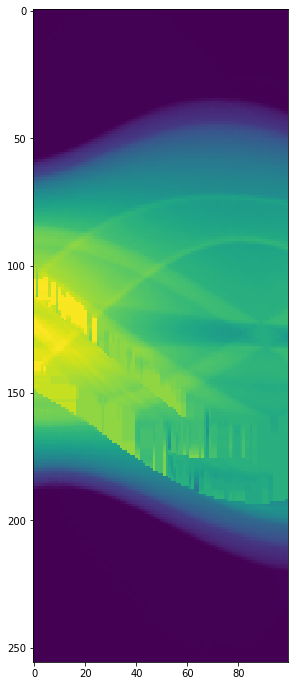

In [12]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:100])
plt.colorbar

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

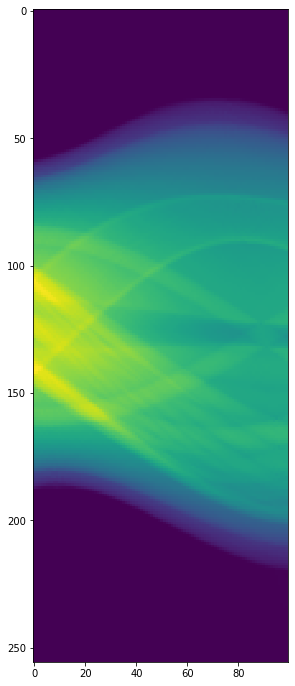

In [16]:
plt.figure(figsize=(8,12))
plt.imshow(metal0_img[:,0:100])
plt.colorbar

In [13]:
f = open("images/sino0.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [14]:
import numpy as np
metal0_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal0_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

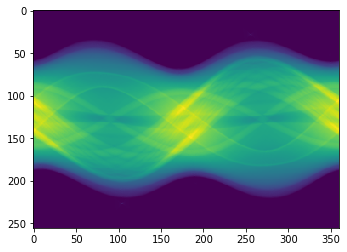

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

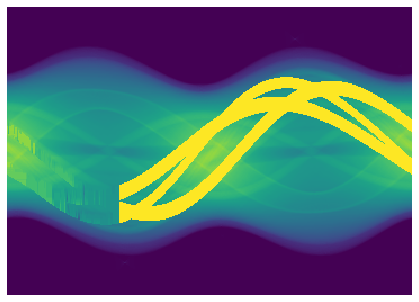

In [17]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/CNN3(100).png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_training_txt.txt', result_img)